<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito+Sans&family=Quicksand&display=swap" rel="stylesheet">

<div display="flex" align="center" justify-content="center" width="100%">

<!-- <img height=80 src="https://drive.google.com/uc?id=13kMLUyF9yPOsfMB782I1wk-_pYNiyxkI"> </img> -->
</div>

<div style="font-family: 'Nunito Sans', sans-serif;">
    
# **Classification**
---
    
</div> 

<div  style="font-size: 22px; color:black; font-family: 'Quicksand', sans-serif;font-weight:500">

Author : Thivin Anandh D 


</div>


<div  style="font-size: 18px; color:black; font-family: 'Quicksand', sans-serif;font-weight:400">
<a href="https://www.linkedin.com/in/thivinanandh/" > Linkedin 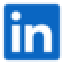</a>
<a href="https://github.com/thivinanandh" > Github 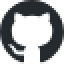</a>

For opening this notebook in google colab, please click on the button below.<br />
<br />
<a href="https://colab.research.google.com/github/thivinanandh/Teaching-Python/blob/main/ML-Algorithms/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

</div>


# Introduction to Classification

## What is Classification?

Classification is a supervised learning technique in machine learning where the goal is to predict the categorical class labels of new instances, based on past observations. Given an input variable (X), the algorithm tries to predict the output class (Y) from a set of predefined categories.

## Types of Classification

### 1. Binary Classification

Binary classification involves categorizing instances into one of two classes. It's the simplest form of classification.

Examples:
- Spam detection (Spam / Not Spam)
- Medical diagnosis (Disease present / Disease absent)
- Customer churn prediction (Will churn / Will not churn)

### 2. Multi-class Classification

Multi-class classification involves categorizing instances into one of three or more classes. Each instance belongs to exactly one class.

Examples:
- Handwritten digit recognition (0-9)
- Plant species classification
- Sentiment analysis (Positive / Neutral / Negative)

### 3. Multi-label Classification

In multi-label classification, each instance can belong to multiple classes simultaneously.

Examples:
- Image tagging (An image can have multiple tags like "beach", "sunset", "people")
- Document categorization (A document can belong to multiple categories)

## Classification Algorithms

This notebook will cover the following classification algorithms:

1. Logistic Regression
2. Support Vector Machines (SVM)
3. Decision Trees
4. Random Forest
5. Gradient Boosting Machines
6. K-Nearest Neighbors (KNN)
7. Naive Bayes

We'll also explore ensemble methods like Voting Classifiers and Stacking.

For each algorithm, we'll focus on:
- Implementation
- Hyperparameter tuning
- Interpretation of results
- Strengths and weaknesses

Let's dive into each algorithm and see how they can be applied to solve classification problems!

# Logistic Regression

Logistic Regression is a fundamental classification algorithm, particularly useful for binary classification problems. Despite its name, it's used for classification, not regression.

## Basic Concept

Logistic Regression models the probability that an instance belongs to a particular class. The model calculates the log-odds of the probability and uses the logistic function to transform it into a probability between 0 and 1.

## Implementation

Here's a basic implementation using scikit-learn:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
```
#### Hyperparameter Tuning
Key hyperparameters for Logistic Regression include:

C: Inverse of regularization strength
penalty: Type of regularization ('l1', 'l2', 'elasticnet', 'none')
solver: Algorithm for optimization problem

Here's an example of hyperparameter tuning using GridSearchCV:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
```

### Interpreting Coefficients
Logistic Regression coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable.

```python
# Assuming binary classification
feature_names = X.columns  # If X is a DataFrame
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")
```

Positive coefficients increase the probability of the positive class, while negative coefficients decrease it. The magnitude of the coefficient indicates its importance.
Pros and Cons
#### Pros:

Simple and interpretable
Works well for linearly separable classes
Provides probability scores

#### Cons:

- Assumes linear relationship between features and log-odds
- May underperform with non-linear relationships
- Can struggle with imbalanced datasets

Logistic Regression is often a good starting point for binary classification problems due to its simplicity and interpretability

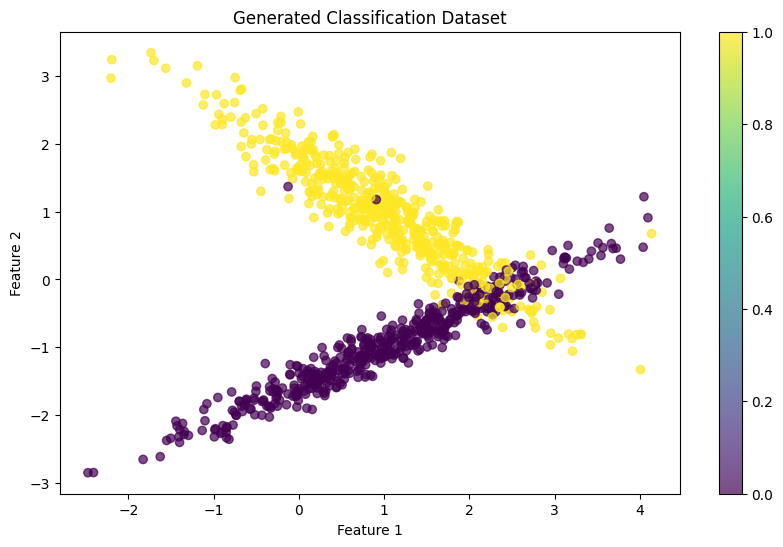

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Best cross-validation score: 0.9049999999999999
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def generate_custom_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification using sklearn's make_classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def visualize_dataset(X, y):
    """
    Visualize the generated dataset.

    Parameters:
    -----------
    X : array of shape (n_samples, n_features)
        The input samples.
    y : array of shape (n_samples,)
        The target values.
    """
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Classification Dataset')
    
    # Add a color bar
    plt.colorbar(scatter)
    
    plt.show()

def create_logistic_regression_pipeline():
    """
    Create a pipeline for logistic regression with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the logistic regression model.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and LogisticRegression.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for logistic regression.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The logistic regression pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        # 'C' is the inverse of regularization strength
        # Smaller values specify stronger regularization
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        
        # 'penalty' specifies the norm used in the penalization
        # 'l2' is the default, which is ridge regression (sum of squares)
        # Note: 'l1' (Lasso) is not included as it's not supported by all solvers
        'classifier__penalty': ['l2'],
        
        # 'solver' specifies the algorithm to use in the optimization problem
        # 'newton-cg': for multinomial loss and L2 penalty
        # 'lbfgs': handles L2 penalty
        # 'sag': for large datasets
        'classifier__solver': ['newton-cg', 'lbfgs', 'sag']
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,  # The pipeline to perform grid search on
        param_grid=param_grid,  # The hyperparameter grid
        cv=5,  # Number of cross-validation folds
        n_jobs=-1,  # Use all available cores for parallel processing
        verbose=1  # Verbosity level (0: no output, 1: some output, 2: detailed output)
    )

    # Fit the grid search to the data
    # This will train the model with all combinations of hyperparameters
    # and select the best one based on cross-validation performance
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and print the accuracy score
    # Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Print a detailed classification report
    # This report includes precision, recall, f1-score, and support for each class
    # Precision: The ability of the classifier not to label as positive a sample that is negative
    # Recall: The ability of the classifier to find all the positive samples
    # F1-score: The harmonic mean of precision and recall
    # Support: The number of occurrences of each class in y_test
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def visualize_decision_boundary(X, y, model):
    """
    Visualize the decision boundary of the logistic regression model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The input samples.
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model.
    """
    # Create a new figure with specified size
    plt.figure(figsize=(10, 6))

    # Create a mesh grid to plot the decision boundary
    # We extend the grid slightly beyond the data points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid points
    # We first flatten the grid to a 2D array, make predictions, then reshape back to the original grid shape
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    # The contourf function is used to create filled contours
    # alpha=0.4 makes the contour fill slightly transparent
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plot the original data points
    # c=y colors the points according to their class
    # cmap='viridis' specifies the colormap to use
    # alpha=0.7 makes the points slightly transparent
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)

    # Label the axes and set the title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    
    # Add a color bar to show the mapping of colors to class labels
    plt.colorbar(scatter)
    
    # Display the plot
    plt.show()


if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_custom_dataset()

    # Visualize the dataset
    visualize_dataset(X, y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the logistic regression pipeline
    pipeline = create_logistic_regression_pipeline()

    # Perform grid search
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Here grid_search.best_estimator_ is the best model that was found by the grid search
    best_model = grid_search.best_estimator_

    # Evaluate the model
    evaluate_model(grid_search.best_estimator_, X_test, y_test)


# About decision boundary
---

Decision boundary is a line that separates the data points of different classes. It is a boundary between two regions of different classes in a classification problem.

In a binary classification problem, the decision boundary is a line that separates the data points of two classes. This line is often a straight line, but it can also be a curve or a more complex surface depending on the complexity of the data and the algorithm used.

For example, in a 2D space with two features, the decision boundary might be a straight line, while in a 3D space with three features, it might be a plane, and in higher dimensions, it could be a hyperplane.

The decision boundary is determined by the model's parameters, which are learned during the training process. The goal of the model is to find the best boundary that separates the data points of different classes.


### Visualization of Decision Boundary

To visualize the decision boundary, we can use the following logic. It involves creating a mesh grid of points and then making predictions on those points. The predictions are then used to create a decision boundary. The code 


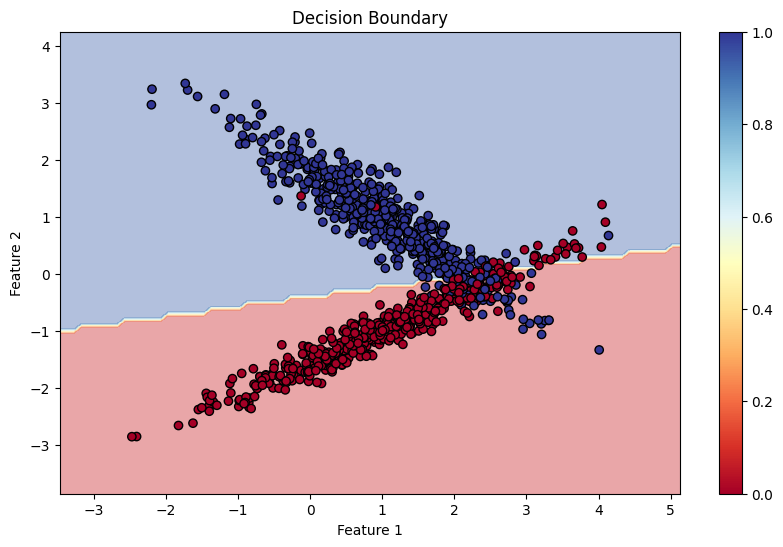

In [6]:
def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    # Create axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')

    # Add a colorbar
    plt.colorbar(scatter, ax=ax)

    return ax

# Assuming you have already:
# 1. Generated your dataset: X, y = generate_custom_dataset()
# 2. Split your data: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Created and trained your model (let's call it 'best_model')

# Now you can plot the decision boundary
plot_decision_boundary(X, y, best_model)
plt.show()